In [44]:
#!pip install pandas
#!pip install odbc

In [45]:
#!pip install pyodbc

In [6]:
import pandas as pd
import pyodbc

In [7]:
server = 'DESKTOP-REFQ1DM'
db = 'parkingdatamain'

conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' + server + ';DATABASE=' + db + ';Trusted_Connection=yes')

sql="""select * from officeittbtest"""

officeittestdf= pd.read_sql(sql, conn)
officeittestdf

,OfficeITPlaceId,DateTimeStamp,OccupancyPercent
0,3,2015-01-01 00:05:00,36.0
1,3,2015-01-01 00:10:00,36.0
2,4,2015-01-01 00:15:00,36.0
3,2,2015-01-01 00:20:00,36.0
4,3,2015-01-01 00:25:00,36.0
...,...,...,...
18140,2,2015-03-04 23:45:00,31.0
18141,1,2015-03-04 23:50:00,31.0
18142,4,2015-03-04 23:55:00,31.0
18143,1,2015-03-05 00:00:00,36.0


In [9]:
tdf1= officeittestdf
tdf1

,OfficeITPlaceId,DateTimeStamp,OccupancyPercent
0,3,2015-01-01 00:05:00,36.0
1,3,2015-01-01 00:10:00,36.0
2,4,2015-01-01 00:15:00,36.0
3,2,2015-01-01 00:20:00,36.0
4,3,2015-01-01 00:25:00,36.0
...,...,...,...
18140,2,2015-03-04 23:45:00,31.0
18141,1,2015-03-04 23:50:00,31.0
18142,4,2015-03-04 23:55:00,31.0
18143,1,2015-03-05 00:00:00,36.0


In [10]:
tdf1['date'] = [d.date() for d in tdf1['DateTimeStamp']]
tdf1['time'] = [d.time() for d in tdf1['DateTimeStamp']]

In [11]:
tdf1

,OfficeITPlaceId,DateTimeStamp,OccupancyPercent,date,time
0,3,2015-01-01 00:05:00,36.0,2015-01-01,00:05:00
1,3,2015-01-01 00:10:00,36.0,2015-01-01,00:10:00
2,4,2015-01-01 00:15:00,36.0,2015-01-01,00:15:00
3,2,2015-01-01 00:20:00,36.0,2015-01-01,00:20:00
4,3,2015-01-01 00:25:00,36.0,2015-01-01,00:25:00
...,...,...,...,...,...
18140,2,2015-03-04 23:45:00,31.0,2015-03-04,23:45:00
18141,1,2015-03-04 23:50:00,31.0,2015-03-04,23:50:00
18142,4,2015-03-04 23:55:00,31.0,2015-03-04,23:55:00
18143,1,2015-03-05 00:00:00,36.0,2015-03-05,00:00:00


In [13]:
tdf1['date'] = pd.to_datetime(tdf1['date'])

In [15]:
DayOfWeek={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
tdf1['NameOfTheDay']=tdf1['date'].dt.dayofweek.map(DayOfWeek)


In [19]:
daynumbering={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
tdf1['NumberingDay']=tdf1['NameOfTheDay'].map(daynumbering)

tdf1['DayType']=tdf1.NumberingDay.apply(lambda x: 'Weekday'if (1<=x<=5) else 'weekend')

#tdf1

In [42]:
tdf1['HourOfDay'] = tdf1['DateTimeStamp'].dt.hour
#tdf1

In [39]:
tdf1['Slots']=tdf1.HourOfDay.apply(lambda x:'S1' if (8<=x<=13) else ('S2' if (14<=x<=19) else ('S3' if (20<=x<=23) else ('S4'))))

In [47]:
tdf1

,OfficeITPlaceId,DateTimeStamp,OccupancyPercent,date,time,NameOfTheDay,NumberingDay,DayType,HourOfDay,Slots
0,3,2015-01-01 00:05:00,36.0,2015-01-01,00:05:00,Thursday,4,Weekday,0,S4
1,3,2015-01-01 00:10:00,36.0,2015-01-01,00:10:00,Thursday,4,Weekday,0,S4
2,4,2015-01-01 00:15:00,36.0,2015-01-01,00:15:00,Thursday,4,Weekday,0,S4
3,2,2015-01-01 00:20:00,36.0,2015-01-01,00:20:00,Thursday,4,Weekday,0,S4
4,3,2015-01-01 00:25:00,36.0,2015-01-01,00:25:00,Thursday,4,Weekday,0,S4
...,...,...,...,...,...,...,...,...,...,...
18140,2,2015-03-04 23:45:00,31.0,2015-03-04,23:45:00,Wednesday,3,Weekday,23,S3
18141,1,2015-03-04 23:50:00,31.0,2015-03-04,23:50:00,Wednesday,3,Weekday,23,S3
18142,4,2015-03-04 23:55:00,31.0,2015-03-04,23:55:00,Wednesday,3,Weekday,23,S3
18143,1,2015-03-05 00:00:00,36.0,2015-03-05,00:00:00,Thursday,4,Weekday,0,S4


In [46]:
#!pip install matplotlib

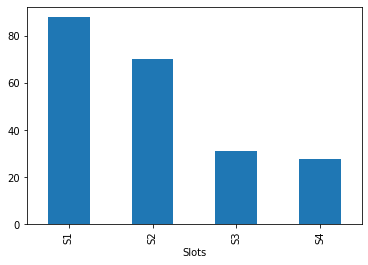

In [41]:
import matplotlib.pyplot as plt

tdf1.groupby(['Slots'])['OccupancyPercent'].mean().plot(kind='bar')
plt.show()

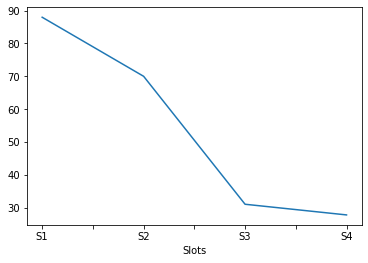

In [53]:
tdf1.groupby(['Slots'])['OccupancyPercent'].mean().plot(kind='line')
plt.show()

In [51]:
tdfm = tdf1[tdf1.DayType=='Weekday']

In [54]:
#tdfm

In [55]:
tdfmdate = tdfm[tdfm['date'].dt.strftime('%Y-%m-%d') == '2015-01-01']

In [58]:
tdfmdate

,OfficeITPlaceId,DateTimeStamp,OccupancyPercent,date,time,NameOfTheDay,NumberingDay,DayType,HourOfDay,Slots
0,3,2015-01-01 00:05:00,36.0,2015-01-01,00:05:00,Thursday,4,Weekday,0,S4
1,3,2015-01-01 00:10:00,36.0,2015-01-01,00:10:00,Thursday,4,Weekday,0,S4
2,4,2015-01-01 00:15:00,36.0,2015-01-01,00:15:00,Thursday,4,Weekday,0,S4
3,2,2015-01-01 00:20:00,36.0,2015-01-01,00:20:00,Thursday,4,Weekday,0,S4
4,3,2015-01-01 00:25:00,36.0,2015-01-01,00:25:00,Thursday,4,Weekday,0,S4
...,...,...,...,...,...,...,...,...,...,...
282,2,2015-01-01 23:35:00,31.0,2015-01-01,23:35:00,Thursday,4,Weekday,23,S3
283,3,2015-01-01 23:40:00,31.0,2015-01-01,23:40:00,Thursday,4,Weekday,23,S3
284,1,2015-01-01 23:45:00,31.0,2015-01-01,23:45:00,Thursday,4,Weekday,23,S3
285,3,2015-01-01 23:50:00,31.0,2015-01-01,23:50:00,Thursday,4,Weekday,23,S3


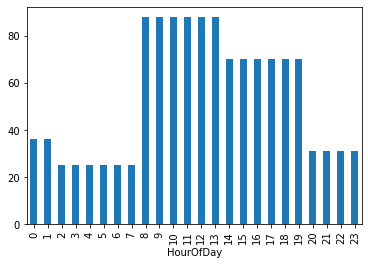

In [60]:
tdfmdate.groupby(['HourOfDay'])['OccupancyPercent'].mean().plot(kind='bar')

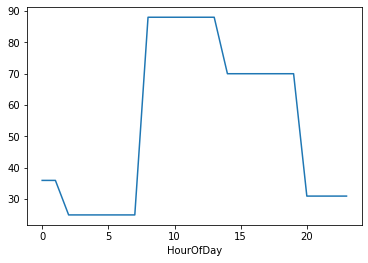

In [69]:
tdfmdate.groupby(['HourOfDay'])['OccupancyPercent'].mean().plot(kind='line')